In [2]:
import cv2
import numpy as np
import time

In [4]:
video = cv2.VideoCapture("video.mp4")

if not video.isOpened():
    print("Cant open video")
    exit()

# Получение исходного FPS и размеров кадра
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Создание объекта VideoWriter для сохранения результата
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Кодек для MP4
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

while True:
    ret, frame = video.read()

    if not ret:
        print('Cant get frame from video')
        break

    scale = 0.5
    frame_resized = cv2.resize(frame, (-1, -1), fx=scale, fy=scale)

    cv2.imshow('Video', frame_resized)

    out.write(frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
out.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

In [3]:
class FPS_Counter:
    def __init__(self, calc_time_perion_N_frames: int) -> None:
        self.time_buffer = []
        self.calc_time_perion_N_frames = calc_time_perion_N_frames

    def calc_FPS(self) -> float:
        time_buffer_is_full = len(self.time_buffer) == self.calc_time_perion_N_frames
        t = time.time()
        self.time_buffer.append(t)

        if time_buffer_is_full:
            self.time_buffer.pop(0)
            fps = len(self.time_buffer) / (self.time_buffer[-1] - self.time_buffer[0])
            return np.round(fps, 2)
        else:
            return 0.0

def calc_and_show_fps(frame, fps_counter):
    fps_real = fps_counter.calc_FPS()
    text = f"FPS: {fps_real:.1f}"

    fontFace = 1
    fontScale = 1.3
    thickness = 1
    
    (label_width, label_height), _ = cv2.getTextSize(
        text,
        fontFace=fontFace,
        fontScale=fontScale,
        thickness=thickness,
    )
    frame = cv2.rectangle(frame, (0, 0), (10 + label_width, 15 + label_height), (0, 0, 0), -1)
    frame = cv2.putText(
        img=frame,
        text=text,
        org=(5, 20),
        fontFace=fontFace,
        fontScale=fontScale,
        thickness=thickness,
        color=(255, 255, 255),
    )
    return frame

In [9]:
fps_counter = FPS_Counter(calc_time_perion_N_frames=10)

video = cv2.VideoCapture("video.mp4")

if not video.isOpened():
    print('Cant open video')
    exit()

# Получение исходного FPS и размеров кадра
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Создание объекта VideoWriter для сохранения результата
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Кодек для MP4
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

while True:
    ret, frame = video.read()

    if not ret:
        print('Cant get frame from video')
        break

    scale = 0.5
    frame_resized = cv2.resize(frame, (-1, -1), fx=scale, fy=scale)
    frame_resized = calc_and_show_fps(frame_resized, fps_counter)

    cv2.imshow('Video', frame_resized)

    out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
out.release()
cv2.destroyAllWindows()

2025-09-06 11:57:01.878 python[46496:3269405] +[IMKClient subclass]: chose IMKClient_Modern
2025-09-06 11:57:01.878 python[46496:3269405] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Cant get frame from video


In [1]:
!pip install patched-yolo-infer

In [4]:
from ultralytics import YOLO

from patched_yolo_infer import (
    visualize_results_usual_yolo_inference,
)

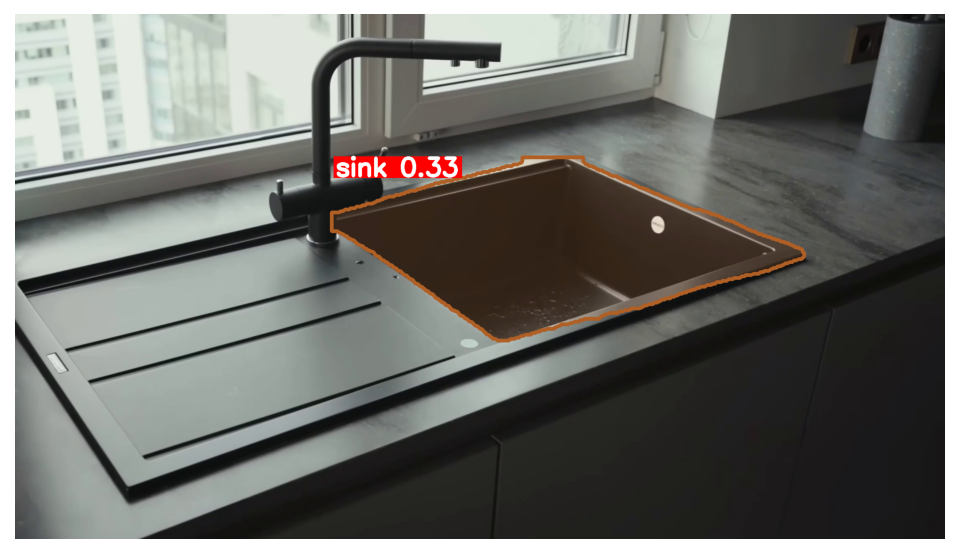

In [6]:
video = cv2.VideoCapture("video.mp4")

if not video.isOpened():
    print('Cant open video')
    exit()

ret, frame = video.read()

# Define the parameters
imgsz = 640
conf = 0.25
iou = 0.7

# Load the YOLOv8 model
model = YOLO("yolov8m-seg.pt")

visualize_results_usual_yolo_inference(
    frame,
    model,
    imgsz,
    conf,
    iou,
    segment=True,
    delta_colors=1,
    thickness=8,
    font_scale=2.0,
    show_boxes=False,
    fill_mask=True,
    alpha=0.2,
    show_confidences=True,
)

In [ ]:
# Define the parameters
imgsz = 640
conf = 0.2
iou = 0.7

# Load the YOLOv8 model
model = YOLO("yolov8m-seg.pt")

fps_counter = FPS_Counter(calc_time_perion_N_frames=10)

video = cv2.VideoCapture("video.mp4")

if not video.isOpened():
    print('Cant open video')
    exit()

# Получение исходного FPS и размеров кадра
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Создание объекта VideoWriter для сохранения результата
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Кодек для MP4
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

while True:
    ret, frame = video.read()

    if not ret:
        print('Cant get frame from video')
        break

    frame = visualize_results_usual_yolo_inference(
        frame,
        model,
        imgsz,
        conf,
        iou,
        segment=True,
        delta_colors=3,
        thickness=8,
        font_scale=2.0,
        show_boxes=False,
        fill_mask=True,
        alpha=1,
        show_confidences=True,
        return_image_array=True
    )

    scale = 0.5
    frame_resized = cv2.resize(frame, (-1, -1), fx=scale, fy=scale)
    frame_resized = calc_and_show_fps(frame_resized, fps_counter)

    cv2.imshow('Video', frame_resized)

    out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
out.release()
cv2.destroyAllWindows()

2025-09-06 12:06:55.084 python[47049:3281590] +[IMKClient subclass]: chose IMKClient_Modern
2025-09-06 12:06:55.084 python[47049:3281590] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [ ]:
# Define the parameters
imgsz = 640
conf = 0.25
iou = 0.7

# Load the YOLOv8 model
model = YOLO("yolov8m.pt")

fps_counter = FPS_Counter(calc_time_perion_N_frames=10)

video = cv2.VideoCapture("video.mp4")

if not video.isOpened():
    print('Cant open video')
    exit()

# Получение исходного FPS и размеров кадра
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Создание объекта VideoWriter для сохранения результата
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Кодек для MP4
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

while True:
    ret, frame = video.read()

    if not ret:
        print('Cant get frame from video')
        break

    frame = visualize_results_usual_yolo_inference(
        frame,
        model,
        imgsz,
        conf,
        iou,
        segment=False,
        delta_colors=3,
        thickness=8,
        font_scale=1.0,
        show_boxes=False,
        fill_mask=True,
        show_confidences=True,
        return_image_array=True
    )

    scale = 0.5
    frame_resized = cv2.resize(frame, (-1, -1), fx=scale, fy=scale)
    frame_resized = calc_and_show_fps(frame_resized, fps_counter)

    cv2.imshow('Video', frame_resized)

    out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
out.release()
cv2.destroyAllWindows()

2025-09-06 12:13:20.273 python[47788:3298322] +[IMKClient subclass]: chose IMKClient_Modern
2025-09-06 12:13:20.273 python[47788:3298322] +[IMKInputSession subclass]: chose IMKInputSession_Modern
